# Projeto de Tópicos em Big Data com Python - 2023.2
## Análise e Visualização de Dados do Atendimento da Empresa de Telecom Linejets
---
## Etapa de Análise
### Responsáveis:
### Camilli Pifano
- Análise de Dados
  - Quais são os 5 principais problemas?
  - O serviço possui mais solicitações de assinatura ou cancelamento?
  - Média de assinaturas por mês
  - Média de tempo no atendimento


### Guilherme de Paiva
- Preparação de Dados
- Análise de Dados
  - Como estão as solicitações de assinatura ao longo do tempo?
  - Quais são os maiores motivos de procura entre cada departamento?
  - Qual a quantidade total de assinaturas?

### Instalando e Importando Bibliotecas

In [ ]:
!pip install ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from ftfy import fix_text
import matplotlib.pyplot as plt

## Leitura dos Dados

In [ ]:
df = pd.read_excel("/content/Linejet.xlsx")

In [ ]:
df.head()

,Status,ID Cliente,Departamento,Canal de comunicaÃ§Ã£o,Aberto por,Finalizado por,Data da abertura,InÃ­cio do atendimento,Fim do atendimento,Tempo total em atendimento,Tempo total em fila,Tempo na Ãºltima fila,Motivo do atendimento,AvaliaÃ§Ã£o
0,Finalizado,NaN,Comercial,WhatsApp,contato,atendente,2023-08-17 16:50:00,2023-08-17 16:54:00,2023-08-17 18:38:00,108 min.,0 min.,0 min.,SOLICITAR ASSINATURA_x000D_\n,NaN
1,Finalizado,NaN,Comercial,WhatsApp,contato,atendente,2023-08-17 19:32:00,2023-08-17 19:38:00,2023-08-17 20:45:00,72 min.,1 min.,1 min.,INFORMAÃ‡ÃƒO COMERCIAL,NaN
2,Finalizado,NaN,Comercial,WhatsApp,contato,atendente,2023-08-18 09:30:00,2023-08-18 09:35:00,2023-08-18 10:21:00,51 min.,1 min.,1 min.,SOLICITAR ASSINATURA_x000D_\n,NaN
3,Finalizado,NaN,Comercial,WhatsApp,contato,atendente,2023-08-18 10:32:00,2023-08-18 10:38:00,2023-08-18 12:10:00,99 min.,1 min.,1 min.,SOLICITAR ASSINATURA_x000D_\n,NaN
4,Finalizado,NaN,Comercial,WhatsApp,contato,atendente,2023-08-18 13:08:00,2023-08-18 13:14:00,2023-08-18 13:47:00,39 min.,2 min.,2 min.,SOLICITAR ASSINATURA_x000D_\n,NaN


In [ ]:
df.head()

,Status,Departamento,Canal de comunicação,Aberto por,Finalizado por,Data da abertura,Início do atendimento,Fim do atendimento,Tempo total em atendimento,Tempo total em fila,Tempo na última fila,Motivo do atendimento
0,Finalizado,Comercial,Whatsapp,Contato,Atendente,2023-08-17 16:50:00,2023-08-17 16:54:00,2023-08-17 18:38:00,108,0,0,Solicitar Assinatura
1,Finalizado,Comercial,Whatsapp,Contato,Atendente,2023-08-17 19:32:00,2023-08-17 19:38:00,2023-08-17 20:45:00,72,1,1,Informação Comercial
2,Finalizado,Comercial,Whatsapp,Contato,Atendente,2023-08-18 09:30:00,2023-08-18 09:35:00,2023-08-18 10:21:00,51,1,1,Solicitar Assinatura
3,Finalizado,Comercial,Whatsapp,Contato,Atendente,2023-08-18 10:32:00,2023-08-18 10:38:00,2023-08-18 12:10:00,99,1,1,Solicitar Assinatura
4,Finalizado,Comercial,Whatsapp,Contato,Atendente,2023-08-18 13:08:00,2023-08-18 13:14:00,2023-08-18 13:47:00,39,2,2,Solicitar Assinatura


## Preparação de Dados

### Correção de caracteres problemáticos

In [ ]:
# Corrige o nome das colunas
df.columns = [fix_text(column_name) for column_name in df.columns]

# Cria um novo dataframe com os dados corrigidos
df = df.applymap(lambda x: fix_text(x).replace("_x000D_\n", "").title() if isinstance(x, str) else x)

### Removendo Valores Ausentes

In [ ]:
# Remove as colunas ID Cliente e Avaliação
df = df.drop(["ID Cliente", "Avaliação"], axis=1)

# Verifica se possui valores ausentes
df.isna().values.any() # True

# Remove as linhas que possui valores ausentes
df = df.dropna()

### Conversão de Formato


In [ ]:
# Lista com o nome das colunas que serão alteradas
columns = ["Tempo total em atendimento", "Tempo total em fila", "Tempo na última fila"]

# Remoção de caracteres não numéricos
df[columns] = df[columns].applymap(lambda x: x.replace(" Min.", ""))

# Conversão de tipo - String para Int
df[columns] = df[columns].apply(pd.to_numeric)

## Análise de Dados



```
# Isto está formatado como código
```

### Como estão as solicitações de assinatura ao longo do tempo?



In [ ]:
# Seleciona todos os dados que são solicitações de assinatura e reduz o dataframe em uma coluna (Data da abertura)
df_sub = df[(df["Motivo do atendimento"] == "Solicitar Assinatura")][["Data da abertura"]]

# Padroniza o horário das datas
df_sub["Data da abertura"] = df_sub["Data da abertura"].dt.normalize()

# Cria uma coluna com a quantidade total de assinaturas em cada dia
df_sub = df_sub.groupby(by=["Data da abertura"], sort=False).size().reset_index(name="Quantidade de assinaturas")

In [ ]:
# Dicionário com os meses para tradução
months_data = {"1": "Janeiro", "2": "Fevereiro",
               "3": "Março", "4": "Abril",
               "5": "Maio", "6": "Junho",
               "7": "Julho", "8": "Agosto",
               "9": "Setembro", "10": "Outubro",
               "11": "Novembro", "12": "Dezembro"}

# List comprehensions para traduzir os meses presentes nos dados
months_in_df = [months_data[str(month)] for month in df_sub["Data da abertura"].dt.month.unique()]

# Cria um novo dataframe com índices do 1 ao 31 e os meses presentes nos dados como colunas
new_df_sub = pd.DataFrame(index=list(range(1, 31 + 1)), columns=months_in_df)

# Cria uma coluna para representar o dia do mês
new_df_sub.insert(0, "Dias", list(range(1, 31 + 1)))

# Percorre as linhas do dataframe e adiciona os valores no índice e coluna especificado
for index, row in df_sub.iterrows():
  new_df_sub.at[row["Data da abertura"].day, months_data[str(row["Data da abertura"].month)]] = row["Quantidade de assinaturas"]

new_df_sub.tail()

,Dias,Agosto,Setembro
27,27,5,5
28,28,18,4
29,29,12,7
30,30,12,6
31,31,19,NaN


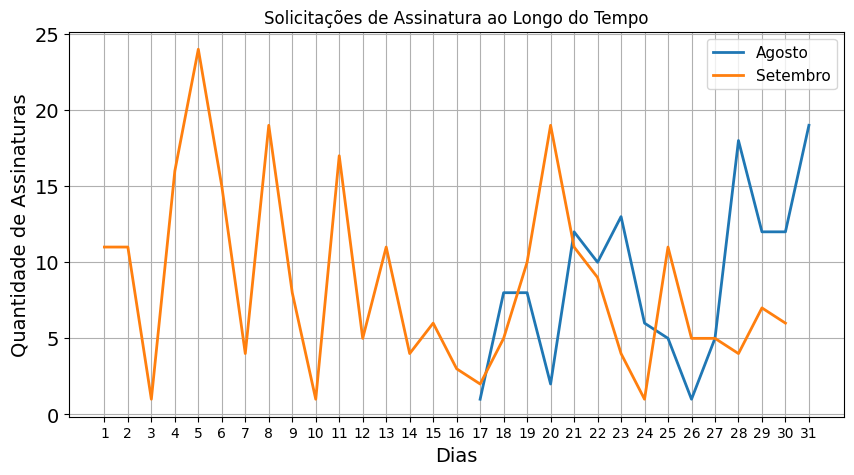

In [ ]:
# Plotando gráfico
plt.figure(figsize=(10, 5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Dias', fontsize=14)
plt.ylabel('Quantidade de Assinaturas', fontsize=14)

plt.grid(True)
plt.title("Solicitações de Assinatura ao Longo do Tempo")
plt.xticks(new_df_sub.index, fontsize=10)

for column in new_df_sub.columns:
  if column != "Dias":
    plt.plot(new_df_sub.index, new_df_sub[column], linewidth=2, label=new_df_sub[column].name)

plt.legend(fontsize=11)

### Quais são os maiores motivos de procura entre cada departamento?

In [ ]:
# Agrupa o dataframe e calcula o tamanho de cada grupo e armazena em uma nova coluna
df_depart = df.groupby(by=["Departamento", "Motivo do atendimento"]).size().reset_index(name='Contagem')

# Filtra o dataframe para retornar o maior valor na coluna "Contagem" entre cada departamento
df_depart = df_depart[df_depart.groupby("Departamento")["Contagem"].transform(max) == df_depart["Contagem"]]

df_depart

,Departamento,Motivo do atendimento,Contagem
12,Comercial,Solicitar Assinatura,361
16,Desbloqueio Em Confiança.,Informar Pagamento De Boleto,25
23,Financeiro,Duvidas Sobre A Fatura,239
70,Suporte,Não Navega,925


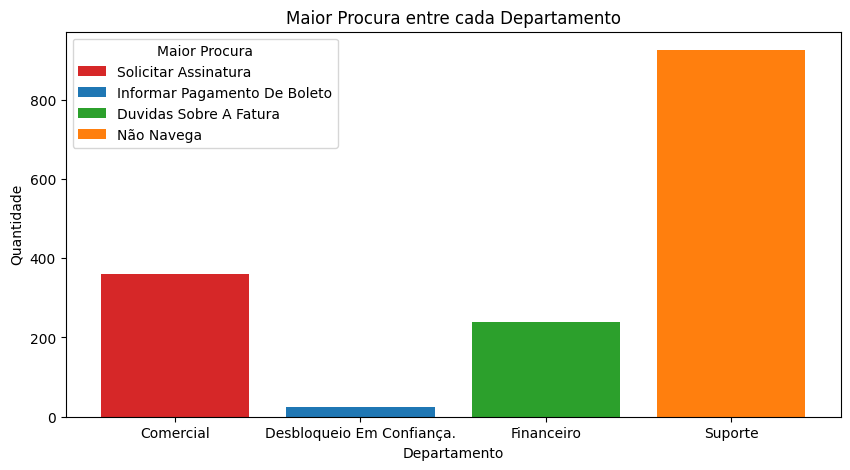

In [ ]:
# Plotando gráfico
fig, ax = plt.subplots(figsize=(10, 5))

bar_labels = df_depart["Motivo do atendimento"].to_list()
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(df_depart["Departamento"], df_depart["Contagem"], label=bar_labels, color=bar_colors)

ax.set_ylabel("Quantidade")
ax.set_xlabel("Departamento")
ax.set_title("Maior Procura entre cada Departamento")
ax.legend(title="Maior Procura")

### Qual a quantidade total de assinaturas?

In [ ]:
# Filtra o dataframe e conta o número de ocorrências
df_sub_count = df[(df["Motivo do atendimento"] == "Solicitar Assinatura")]["Motivo do atendimento"].count()
df_sub_count

387

----------------------------

### Quais são os 5 principais problemas?

In [ ]:
# Cria uma variável que conta da coluna Departamento um rank dos 5 maiores motivos de procura
rank = df.loc[df["Departamento"] == ("Suporte"), "Motivo do atendimento"].value_counts().head(5)
# Mostra o resultado
display(rank)

Não Navega                  925
Lentidão                    703
Confirmar Visita Técnica    375
Informações                 331
Inatividade                 320
Name: Motivo do atendimento, dtype: int64

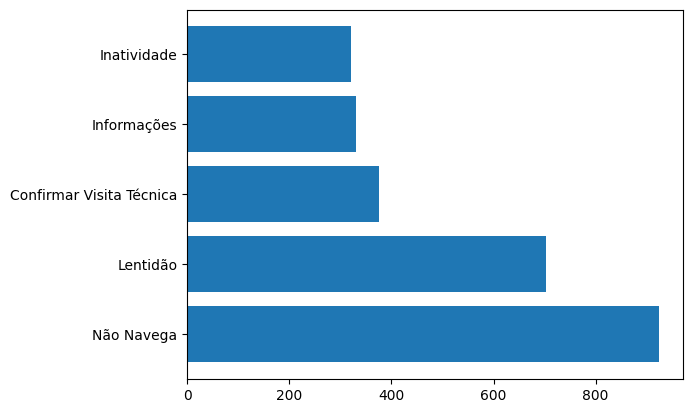

In [ ]:
# Gráfico de barra horizontal, onde o eixo Y representa os problemas e o eixo X representa a contagem dos problemas
# mudar p horizontal
# Definindo o que vai ser exibido
qntdd = [925, 703, 375, 331, 320]
motiv = ["Não Navega", "Lentidão", "Confirmar Visita Técnica", "Informações", "Inatividade"]

# Gerando o gráfico
plt.barh(motiv, qntdd)
plt.show()

### O serviço possui mais solicitações de assinatura ou cancelamento?

In [ ]:
# Conta as linhas com as informarções necessárias da coluna específica
assin = df.loc[df['Motivo do atendimento'] == ('Solicitar Assinatura'), 'Motivo do atendimento'].count()
cancel = df.loc[df['Motivo do atendimento'] == ('Solicitar Cancelamento Da Assinatura'), 'Motivo do atendimento'].count()

# Mostra o resultado copiável
display(f"Assinaturas: {assin}", f"Cancelamentos: {cancel}")

'Assinaturas: 387'

'Cancelamentos: 99'

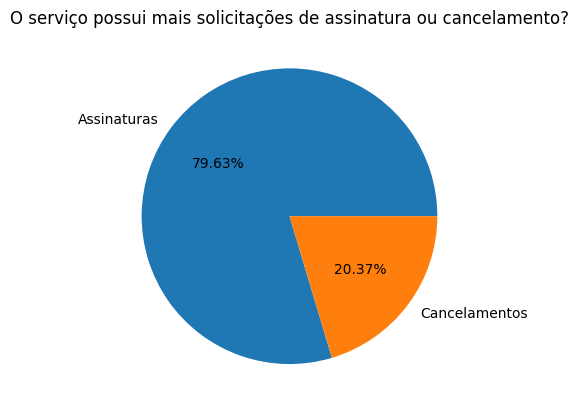

In [ ]:
# Gráfico de pizza, onde uma parte representa quantidade de solicitações e a outra parte representa as quantidade de cancelamentos
# Definindo o que vai ser exibido
fatias = (387, 99)
nomes = ["Assinaturas", "Cancelamentos"]

# Gerando o gráfico
plt.pie(fatias, labels = nomes, autopct="%1.2f%%")
plt.title(label = "O serviço possui mais solicitações de assinatura ou cancelamento?")
plt.show()

### Média de assinaturas por mês

In [ ]:
# Cria uma nova df
df_mes = df[(df["Motivo do atendimento"] == "Solicitar Assinatura")][["Data da abertura"]]

# Altera a formatação das datas pra mês e ano
div = pd.to_datetime(df_mes["Data da abertura"], format='%m/%d/%Y').dt.strftime("%m/%Y")

# Adiciona a coluna div na df criada
df_mes["div"] = div

# Filtra e conta a quantidade de solicitação de assinatura por mês
agost = df_mes.loc[df_mes["div"] == ("08/2023"), "div"].count()
setem = df_mes.loc[df_mes["div"] == ("09/2023"), "div"].count()

# Faz a media
media = (agost + setem)/2

# Mostra o resultado
display(media)

193.5

### Média de tempo no atendimento

In [ ]:
# Pega todos os valores da coluna, conta e depois faz a média
media_temp = df["Tempo total em atendimento"].value_counts().mean()

# Mostra o resultado copiável
display(f"Média de tempo total em atendimento: {media_temp:,.1f} min.")

'Média de tempo total em atendimento: 31.7 min.'